In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


c:\Boyko Boev\Stock-Market-Prediction\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# from mplfinance.original_flavor import candlestick_ohlc

from utils.chart import config_chart
from constants import SP500_TICKER
from models.cnn_v3.cnn_normalize import prepare_data, generate_images, get_images, get_images_dataset, get_classes_and_files, map_classes_and_files, split_train_and_test_data, get_cnn_data

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(5959, 16)
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Change          float64
Direction         int64
MA10            float64
MA20            float64
MA50            float64
MA100           float64
RSI             float64
Stochastic_K    float64
Stochastic_D    float64
Date             object
dtype: object


,Open,High,Low,Close,Adj Close,Volume,Change,Direction,MA10,MA20,MA50,MA100,RSI,Stochastic_K,Stochastic_D,Date
Date,,,,,,,,,,,,,,,,
2000-05-24,1373.859985,1401.750000,1361.089966,1399.050049,1399.050049,1152300000,25.190063,1,1421.276001,1426.065509,1454.346997,1428.297998,44.368469,23.745746,29.372265,2000-05-24
2000-05-25,1399.050049,1411.650024,1373.930054,1381.520020,1381.520020,984500000,-17.530029,0,1418.646997,1421.895508,1454.134597,1427.560999,41.539809,19.487574,22.178108,2000-05-25
2000-05-26,1381.520020,1391.420044,1369.750000,1378.020020,1378.020020,722600000,-3.500000,0,1414.353003,1418.175006,1452.525598,1427.346998,40.978078,22.968362,22.067228,2000-05-26
2000-05-30,1378.020020,1422.449951,1378.020020,1422.449951,1422.449951,844200000,44.429932,1,1411.362000,1415.885004,1451.685198,1427.550398,50.186817,30.103998,24.186645,2000-05-30
2000-05-31,1422.439941,1434.489990,1415.500000,1420.599976,1420.599976,960500000,-1.839966,0,1406.817993,1414.600500,1450.964597,1427.721898,49.838139,42.021155,31.697838,2000-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000,7.500000,1,4816.775049,4781.978076,4677.269023,4507.758813,72.932465,92.601030,93.015869,2024-01-25
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000,2.060059,1,4827.848047,4787.447583,4686.857432,4511.510815,72.142640,90.749789,91.389010,2024-01-26
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000,34.979980,1,4842.258057,4794.676587,4695.502031,4515.821816,75.458828,95.820406,93.057075,2024-01-29


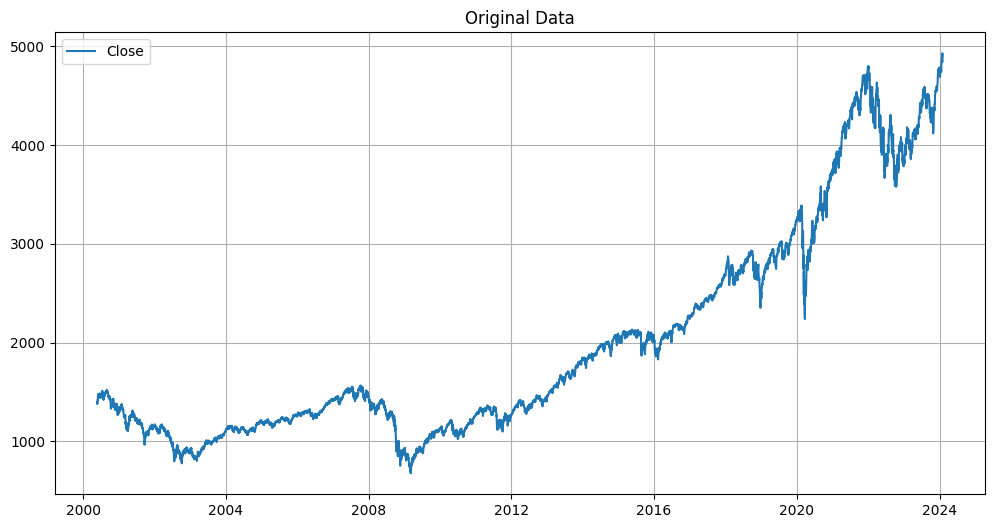

In [3]:
data = prepare_data(SP500_TICKER)


# Show data
print(data.shape)
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

data

---

## For **generate_images** function

In [16]:
# generate_images(data)


---

## For **get_images** function

In [17]:
images = get_images()

# img = images.__next__()[0]
# img.shape
# plt.imshow(img[4] / 255.0)

images

Found 1980 images belonging to 5 classes.


---

## For **get_classes_and_files** function

In [21]:
classes, folders = get_classes_and_files()

print(len(classes))
print(classes)

print(len(folders))
print(folders)


5
['bearish_reverse', 'bearish_trend', 'bullish_reverse', 'bullish_trend', 'neutral']
5
['models/cnn_v3/images/bearish_reverse', 'models/cnn_v3/images/bearish_trend', 'models/cnn_v3/images/bullish_reverse', 'models/cnn_v3/images/bullish_trend', 'models/cnn_v3/images/neutral']


---

## For **map_classes_and_files** function

In [7]:
all_files, all_class_ids = map_classes_and_files(classes, folders)

print(len(all_files))
print(all_files[0])

print(len(all_class_ids))
print(all_class_ids[0])

1980
models/cnn_v3/images/bearish_reverse\2000-06-20.png
1980
0


---

## For **get_images_dataset** function

1980
1980
Class 0: count 146
Class 1: count 302
Class 2: count 102
Class 3: count 420
Class 4: count 1010


Text(0.5, 1.0, 'bearish_reverse')

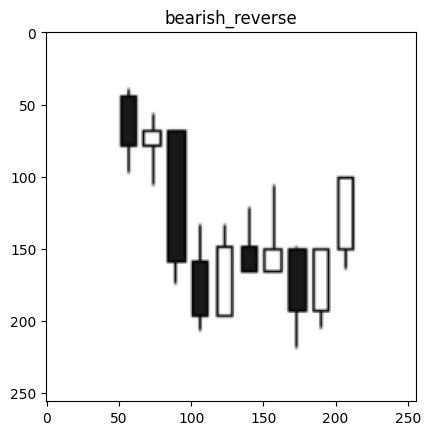

In [22]:
images, labels = get_images_dataset(all_files, all_class_ids)


print(len(images))
print(len(labels))

unique_values, counts = np.unique(labels, return_counts=True)
for value, count in zip(unique_values, counts):
  print(f"Class {value}: count {count}")

plt.imshow(images[0])
plt.title(classes[labels[0]])


---

## For **split_train_and_test_data** function

In [9]:
train_dataset, test_dataset, predict_dataset = split_train_and_test_data(images, labels)


print(train_dataset["x"][0])
print(train_dataset["y"][0])

print(test_dataset["x"][0])
print(test_dataset["y"][0])

print(predict_dataset["x"][0])
print(predict_dataset["y"][0])

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
0
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  

---

## For **get_lstm_data** function

In [10]:
train, test, predict = get_cnn_data(SP500_TICKER)

In [11]:

print(len(train["x"]))
print(len(train["y"]))

unique_values, counts = np.unique(train["y"], return_counts=True)

for value, count in zip(unique_values, counts):
  print(f"Class {value}: count {count}")

# print(tf.data.experimental.cardinality(test_dataset).numpy())
# print(tf.data.experimental.cardinality(predict_dataset).numpy())

1584
1584
Class 0: count 120
Class 1: count 248
Class 2: count 89
Class 3: count 320
Class 4: count 807


In [12]:
print(len(test["x"]))
print(len(test["y"]))

unique_values, counts = np.unique(test["y"], return_counts=True)

for value, count in zip(unique_values, counts):
  print(f"Class {value}: count {count}")

# print(test)
# print(tf.data.experimental.cardinality(test).numpy())


198
198
Class 0: count 15
Class 1: count 29
Class 2: count 6
Class 3: count 44
Class 4: count 104


In [13]:
print(len(predict["x"]))
print(len(predict["y"]))

unique_values, counts = np.unique(predict["y"], return_counts=True)

for value, count in zip(unique_values, counts):
  print(f"Class {value}: count {count}")

# print(predict) 
# print(tf.data.experimental.cardinality(predict).numpy())

198
198
Class 0: count 11
Class 1: count 25
Class 2: count 7
Class 3: count 56
Class 4: count 99


In [14]:
# num_columns = predict["x"].shape[1]  # Get the number of columns

# index = 20

# plt = config_chart('Model Data')
# plt.plot(predict['x_dates'][0:index], predict["x"][:, 0][0:index])
# plt.plot(predict['x_dates'][0:index], predict["x"][:, 1][0:index])
# plt.plot(predict['x_dates'][0:index], predict["x"][:, 2][0:index])
# plt.plot(predict['x_dates'][0:index], predict["x"][:, 3][0:index])
# # plt.title(f'Column {i+1}')
# plt.xlabel('Index')
# plt.ylabel('Value')

# plt.grid(True)  # Add grid
# plt.tight_layout()
# plt.savefig('stock_price_50x50.png', dpi=100)  # Save as PNG image with 100 DPI
# plt.close()

# plt.grid(True)
# plt.show()


In [15]:
# BASE_DIR = "models/cnn_v3/data/"

# generator = ImageDataGenerator()

# images = generator.flow_from_directory(BASE_DIR)

# img = images.__next__()[0]
# img.shape

# plt.imshow(img[4] / 255.0)

# Dataset.from_tensor_slices([1,2,3])

# classes = os.listdir(BASE_DIR)
# folders = [BASE_DIR + class_name for class_name in classes]

# print(classes)

# all_files = []
# print(folders)
# all_classes = []

# for folder_name, class_name in zip(folders, classes):
#     files = os.listdir(folder_name)
#     all_files.extend([os.path.join(folder_name, file) for file in files])
#     all_classes.extend([class_name] * len(files))

# print(len(all_files))
# print(len(all_classes))

# class_mapping = {class_name: class_id for (class_id, class_name) in list(enumerate(classes))}

# all_class_ids = [class_mapping[c] for c in all_classes]

# def read_images(file_name, class_name):
#     image_file = tf.io.read_file(file_name)
#     image = tf.image.decode_png(image_file)
#     image_scaled = tf.cast(image, float) / 255.0
#     image_resized = tf.image.resize(image_scaled, (256, 256))
#     return (image_resized, class_name)

# dataset = Dataset.from_tensor_slices((all_files, all_class_ids)).shuffle(len(all_files)).map(read_images).batch(4).repeat()


# for el in dataset.take(1):
#     print(el[0].numpy(), el[1].numpy())
# model = Sequential([
#         Input((256, 256, 4)),
#         Conv2D(filters=32, kernel_size=(3, 4), activation='relu'),
#         Conv2D(filters=16, kernel_size=(3, 4), activation='relu'),
#         Conv2D(filters=8, kernel_size=(3, 4), activation='relu'),
#         Flatten(),
#         Dense(units=32, activation='relu'),
#         Dense(units=5, activation='softmax')
#     ])

# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
# model.fit(dataset, epochs=10, steps_per_epoch=len(all_files) // 4)

